## Importing the libraries


In [ ]:
#Data Handleing tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
# For ploting the graphs
import matplotlib.pyplot as plt
import seaborn as sns
import csv
# Machine learning Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
# Machine learning model evaluation
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Innovaskill ME projects/Machine Learning Intrusion Detection/Dataset/Intrusion Detection Dataset/DDos.csv")

## Data Preprocessing

In [ ]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [ ]:
df.shape

(225745, 79)

In [ ]:
# for i in range(len(df.columns)):

#   count=df.iloc[:,i].isnull().sum()
#   col=df.columns[i]
#   print(col,":", count)


In [ ]:
# print(df['Destination Port'].isna().sum())

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225745 entries, 0 to 225744
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             225745 non-null  int64  
 1    Flow Duration                225745 non-null  int64  
 2    Total Fwd Packets            225745 non-null  int64  
 3    Total Backward Packets       225745 non-null  int64  
 4   Total Length of Fwd Packets   225745 non-null  int64  
 5    Total Length of Bwd Packets  225745 non-null  int64  
 6    Fwd Packet Length Max        225745 non-null  int64  
 7    Fwd Packet Length Min        225745 non-null  int64  
 8    Fwd Packet Length Mean       225745 non-null  float64
 9    Fwd Packet Length Std        225745 non-null  float64
 10  Bwd Packet Length Max         225745 non-null  int64  
 11   Bwd Packet Length Min        225745 non-null  int64  
 12   Bwd Packet Length Mean       225745 non-nul

In [ ]:
df.isnull().sum()

 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
 Idle Std                      0
 Idle Max                      0
 Idle Min                      0
 Label                         0
Length: 79, dtype: int64

In [ ]:
# Remove the spaces before the column names
df.columns = df.columns.str.strip()

In [ ]:
# df.info()

In [ ]:
#Unique values in the Label target column
df.loc[:,'Label'].unique()

array(['BENIGN', 'DDoS'], dtype=object)

In [ ]:
df.isna().count()

Destination Port               225745
Flow Duration                  225745
Total Fwd Packets              225745
Total Backward Packets         225745
Total Length of Fwd Packets    225745
                                ...  
Idle Mean                      225745
Idle Std                       225745
Idle Max                       225745
Idle Min                       225745
Label                          225745
Length: 79, dtype: int64

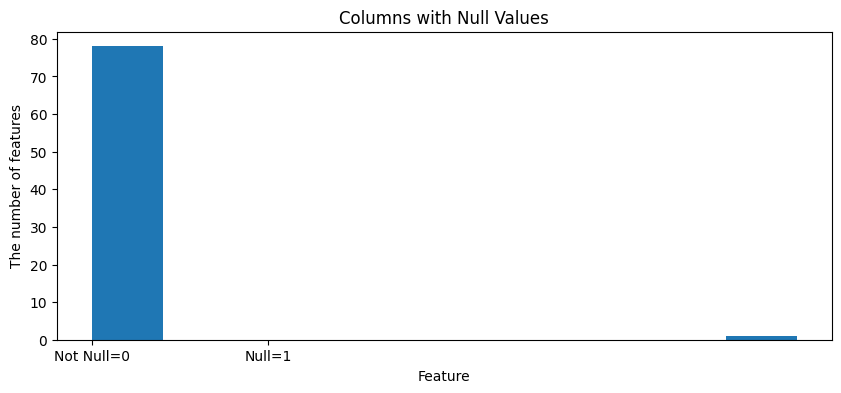

In [ ]:
#Checking the null values in the dataset.
plt.figure(1,figsize=( 10,4))
plt.hist( df.isna().sum())

# Set the title and axis labels
plt.xticks([0, 1], labels=['Not Null=0', 'Null=1'])
plt.title('Columns with Null Values')
plt.xlabel('Feature')
plt.ylabel('The number of features')

# Show the plot
plt.show()


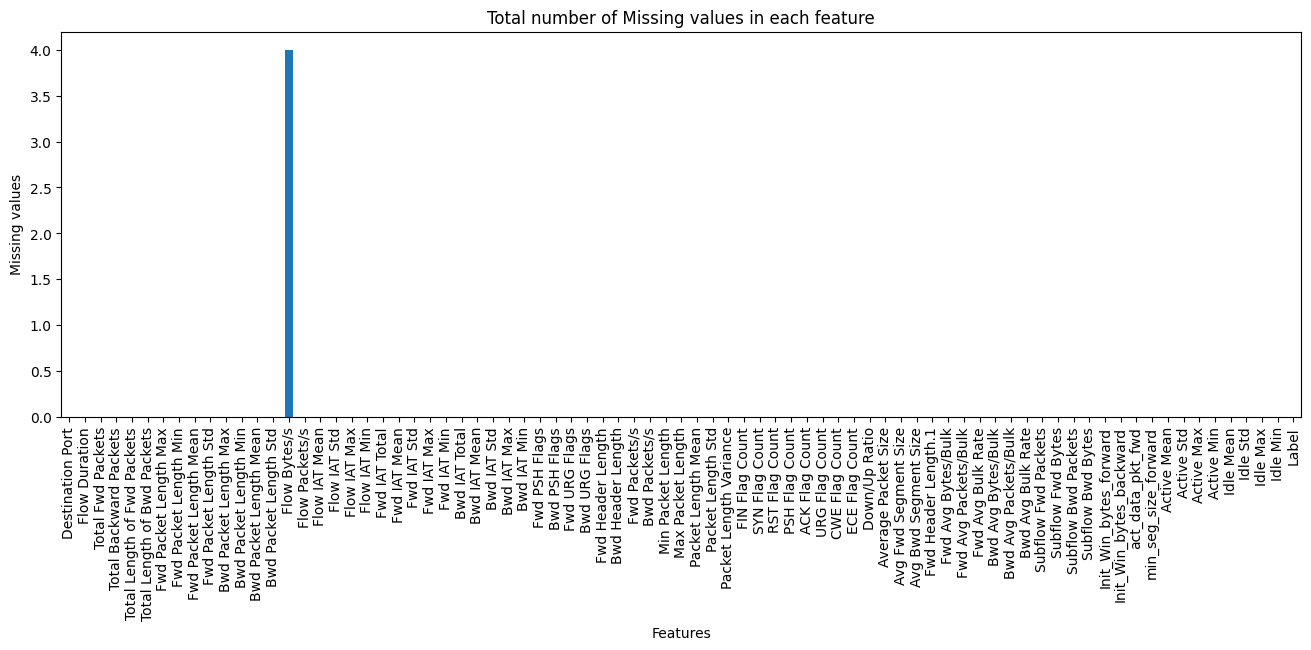

In [ ]:
def plotMissingValues(dataframe):
    missing_values = dataframe.isnull().sum()  # Counting null values for each column
    fig = plt.figure(figsize=(16, 5))
    missing_values.plot(kind='bar')
    plt.xlabel("Features")
    plt.ylabel("Missing values")
    plt.title("Total number of Missing values in each feature")
    plt.show()

plotMissingValues(df)

In [ ]:
# df['Flow Bytes/s'].isnull().sum()

In [ ]:
# df['Flow Packets/s'].isnull().sum()

In [ ]:
## Removing the null values
data_f=df.dropna()

In [ ]:
pd.set_option('use_inf_as_na', True)  # Treat inf as NaN
null_values=data_f.isnull().sum()  # Check for NaN values

print(null_values.sum())

60


In [ ]:
# To know the data types of the columns
(data_f.dtypes=='object')

Destination Port               False
Flow Duration                  False
Total Fwd Packets              False
Total Backward Packets         False
Total Length of Fwd Packets    False
                               ...  
Idle Mean                      False
Idle Std                       False
Idle Max                       False
Idle Min                       False
Label                           True
Length: 79, dtype: bool

In [ ]:
# Convert the labels in the DataFrame to numerical values
data_f['Label'] = data_f['Label'].map({'BENIGN': 0, 'DDoS': 1})

<ipython-input-22-4f96cf6dbfb9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f['Label'] = data_f['Label'].map({'BENIGN': 0, 'DDoS': 1})


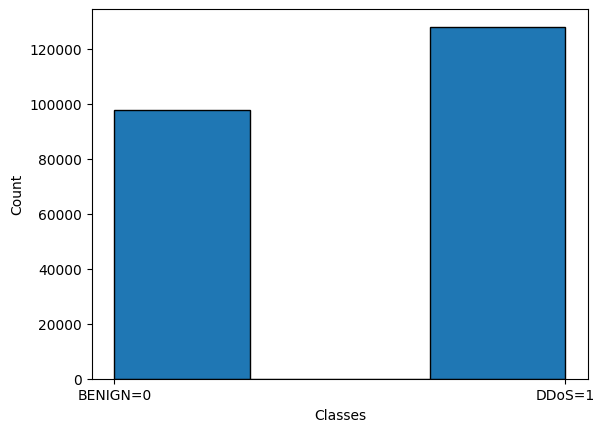

In [ ]:
# Print the DataFrame
plt.hist(data_f['Label'], bins=[0, 0.3,0.7,1], edgecolor='black')  # Specify bins as [0, 1]
plt.xticks([0, 1], labels=['BENIGN=0', 'DDoS=1'])
plt.xlabel("Classes")
plt.ylabel("Count")
plt.show()

## Data exploring

In [ ]:
data_f.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
count,225741.000000,2.257410e+05,225741.000000,225741.000000,225741.000000,2.257410e+05,225741.000000,225741.000000,225741.000000,225741.000000,...,225741.000000,2.257410e+05,2.257410e+05,2.257410e+05,2.257410e+05,2.257410e+05,2.257410e+05,2.257410e+05,2.257410e+05,225741.000000
mean,8879.294213,1.624194e+07,4.874972,4.572851,939.479993,5.960583e+03,538.545235,27.882715,164.829636,214.911050,...,21.482513,1.848294e+05,1.293459e+04,2.080886e+05,1.776232e+05,1.032233e+07,3.612007e+06,1.287836e+07,7.755493e+06,0.567141
std,19754.491905,3.152458e+07,15.423004,21.755541,3249.429866,3.921868e+04,1864.144128,163.325564,504.896961,797.417625,...,4.166390,7.979317e+05,2.102755e+05,9.002425e+05,7.842668e+05,2.185318e+07,1.275700e+07,2.692145e+07,1.983124e+07,0.495473
min,0.000000,-1.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,80.000000,7.118300e+04,2.000000,1.000000,26.000000,0.000000e+00,6.000000,0.000000,6.000000,0.000000,...,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,80.000000,1.452362e+06,3.000000,4.000000,30.000000,1.640000e+02,20.000000,0.000000,8.666667,5.301991,...,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000
75%,80.000000,8.805245e+06,5.000000,5.000000,63.000000,1.160100e+04,34.000000,6.000000,32.000000,10.263203,...,20.000000,1.878000e+03,0.000000e+00,1.878000e+03,1.862000e+03,8.239754e+06,0.000000e+00,8.253869e+06,7.422871e+06,1.000000
max,65532.000000,1.199999e+08,1932.000000,2942.000000,183012.000000,5.172346e+06,11680.000000,1472.000000,3867.000000,6692.644993,...,52.000000,1.000000e+08,3.950000e+07,1.000000e+08,1.000000e+08,1.200000e+08,6.530000e+07,1.200000e+08,1.200000e+08,1.000000


# **EDA Analysis**





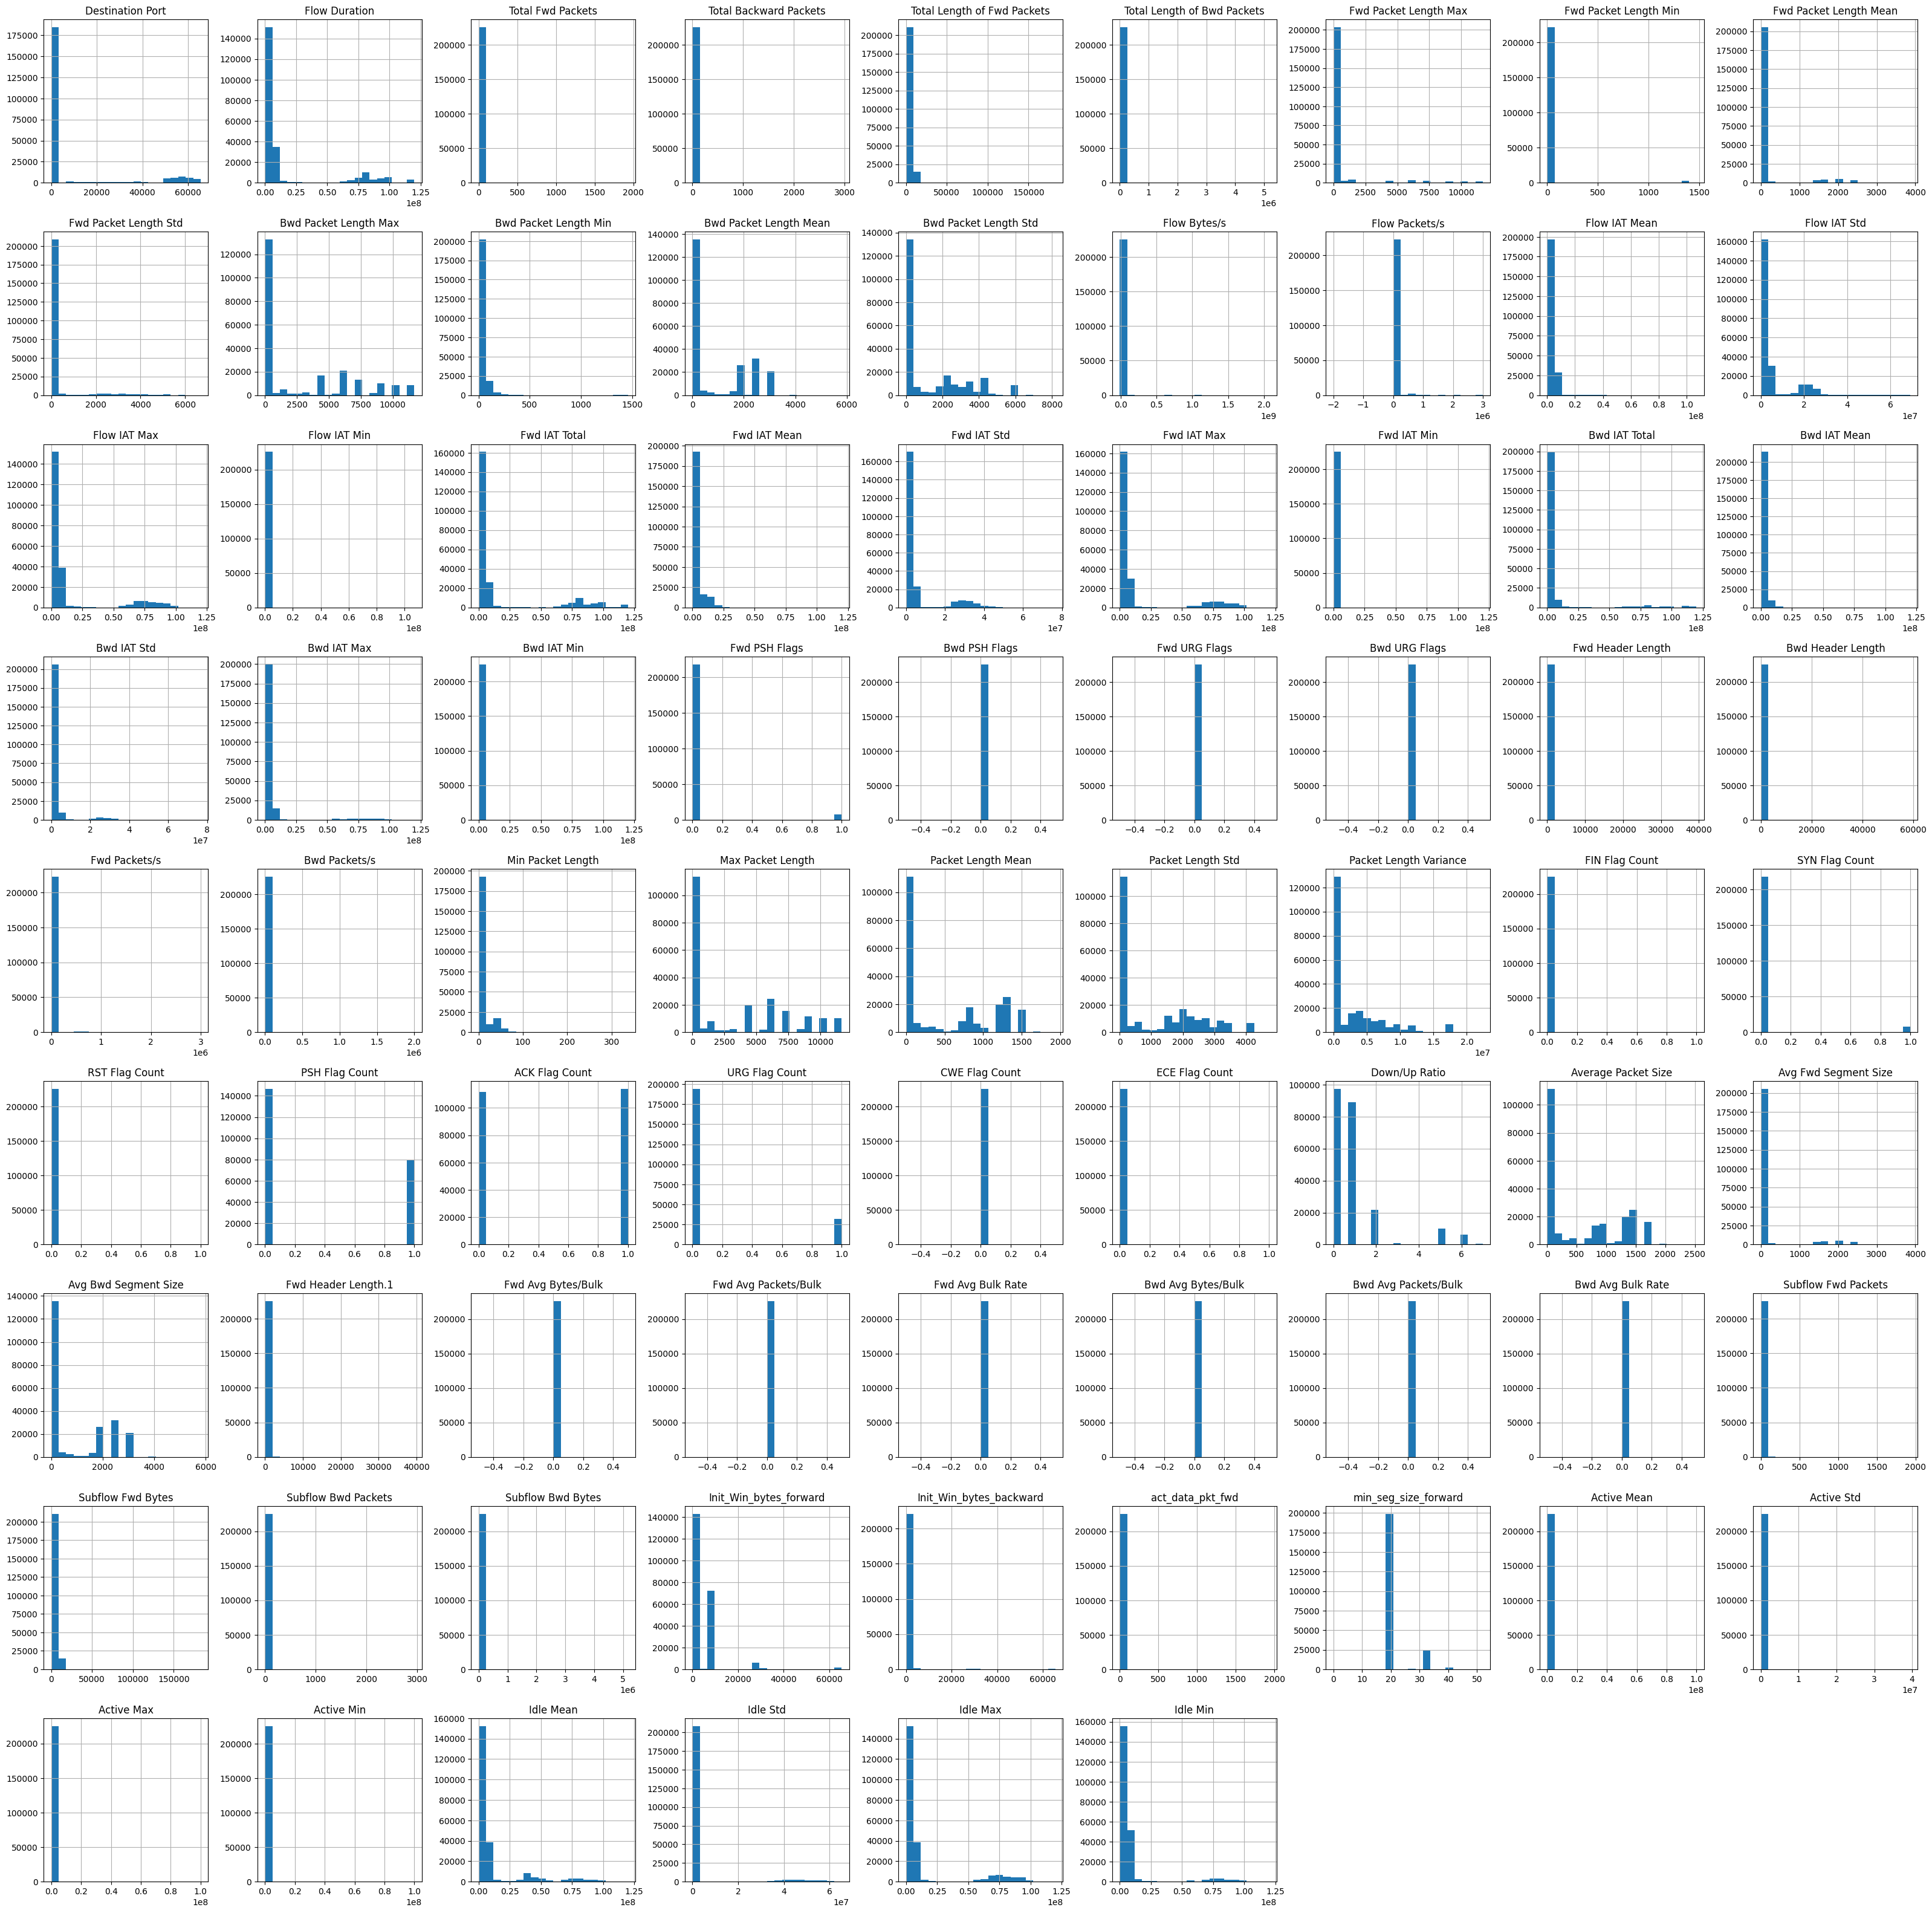

In [ ]:
# Plot histograms for selected numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
data_f[numeric_columns].hist(figsize=(40, 40), bins=20)
plt.show()

In [ ]:
# Plot a heatmap to visualize correlations between numeric features
plt.figure(figsize=(40,40))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


Output hidden; open in https://colab.research.google.com to view.

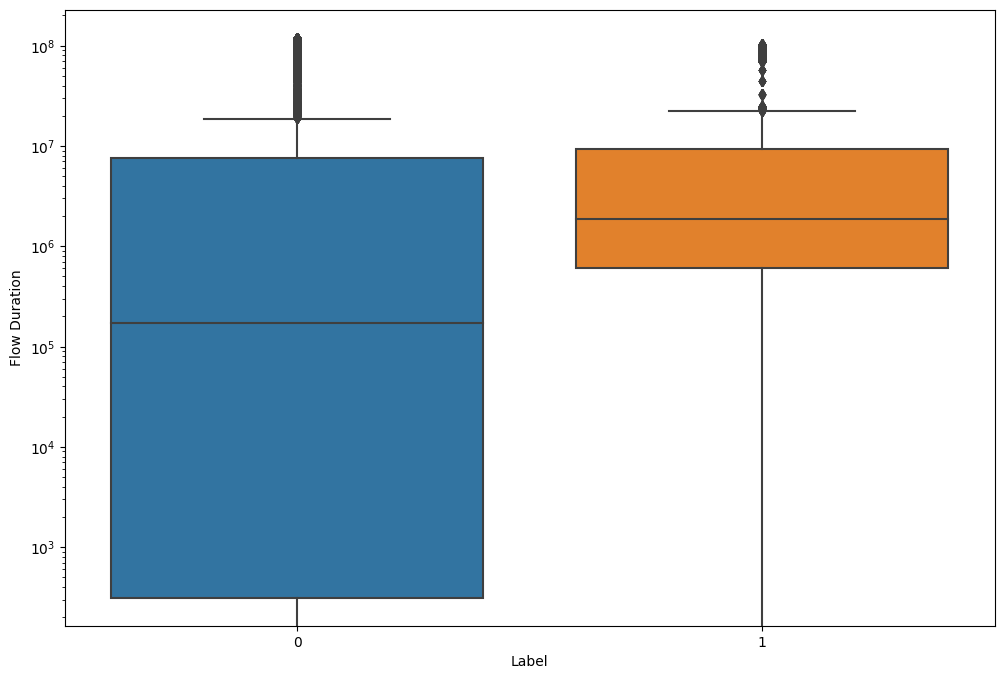

In [ ]:
# Example for 'Label' vs 'Flow Duration'
plt.figure(figsize=(12, 8))
sns.boxplot(x='Label', y='Flow Duration', data=data_f)
plt.yscale('log')  # Log scale for better visibility
plt.show()


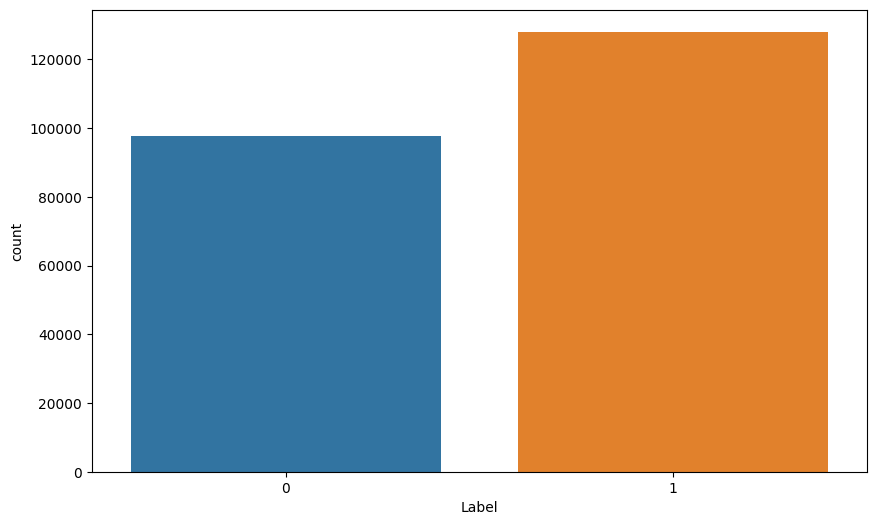

In [ ]:
#barplot of Target Variable
plt.figure(figsize=(10, 6))
sns.countplot(x='Label', data=data_f)
plt.show()

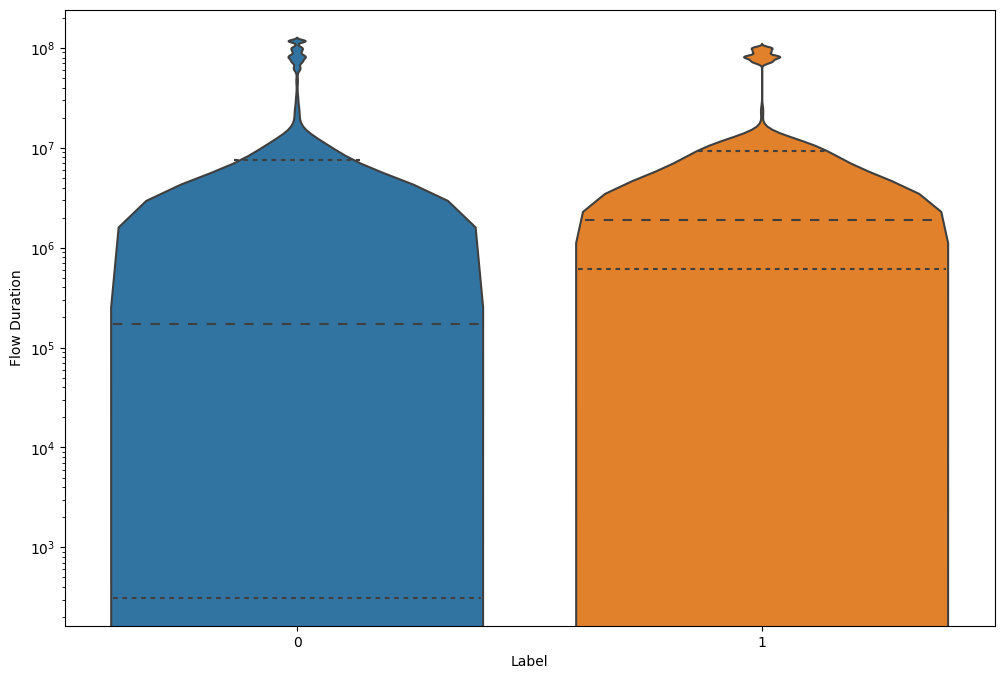

In [ ]:
# Violin plot to compare 'Label' vs 'Flow Duration'
plt.figure(figsize=(12, 8))
sns.violinplot(x='Label', y='Flow Duration', data=data_f, scale='width', inner='quartile')
plt.yscale('log')  # Log scale for better visibility
plt.show()


<Figure size 1200x800 with 0 Axes>

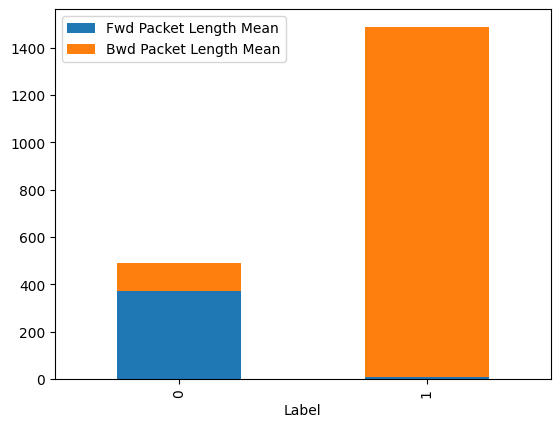

In [ ]:
# Stacked bar chart for 'Label' vs 'Fwd Packet Length Mean' and 'Bwd Packet Length Mean'
plt.figure(figsize=(12, 8))
df_grouped = data_f.groupby('Label')[['Fwd Packet Length Mean', 'Bwd Packet Length Mean']].mean()
df_grouped.plot(kind='bar', stacked=True)
plt.show()


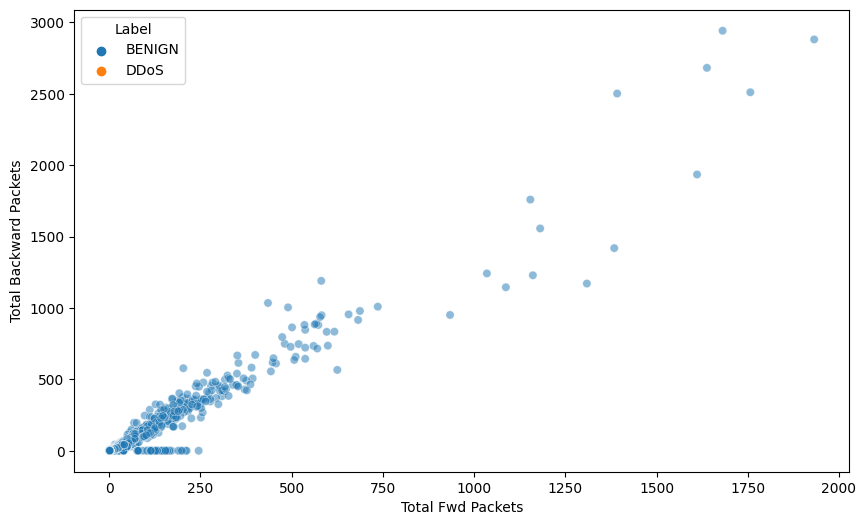

In [ ]:
# Scatter plot for 'Total Fwd Packets' vs 'Total Backward Packets'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total Fwd Packets', y='Total Backward Packets', hue='Label', data=data_f, alpha=0.5)
plt.show()


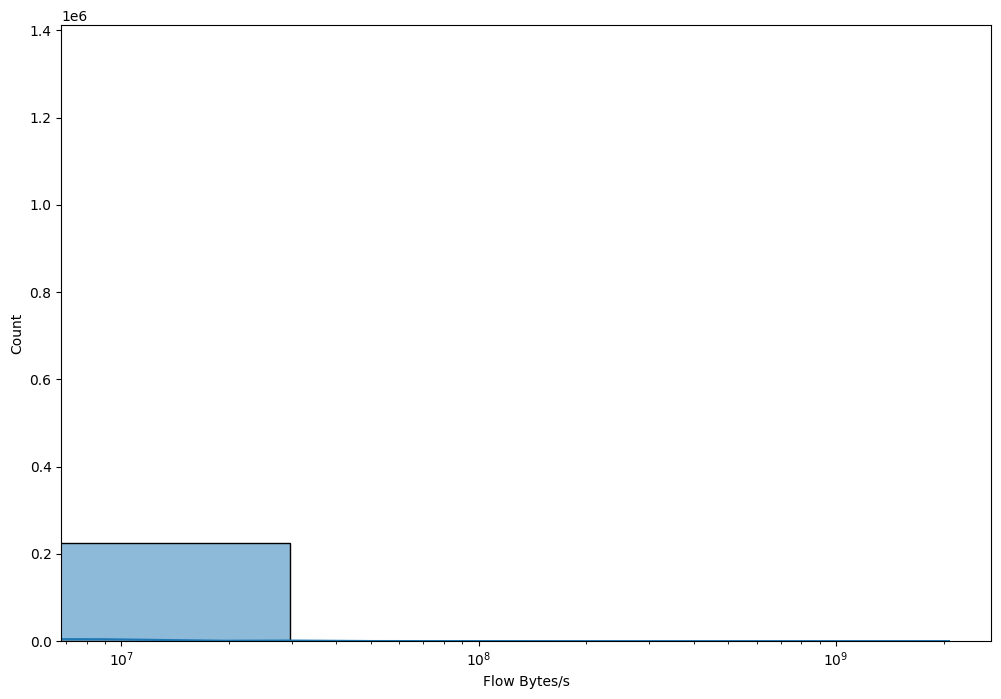

In [ ]:
# Distribution of 'Flow Bytes/s'
plt.figure(figsize=(12, 8))
sns.histplot(data_f['Flow Bytes/s'], bins=50, kde=True)
plt.xscale('log')  # Log scale for better visibility
plt.show()


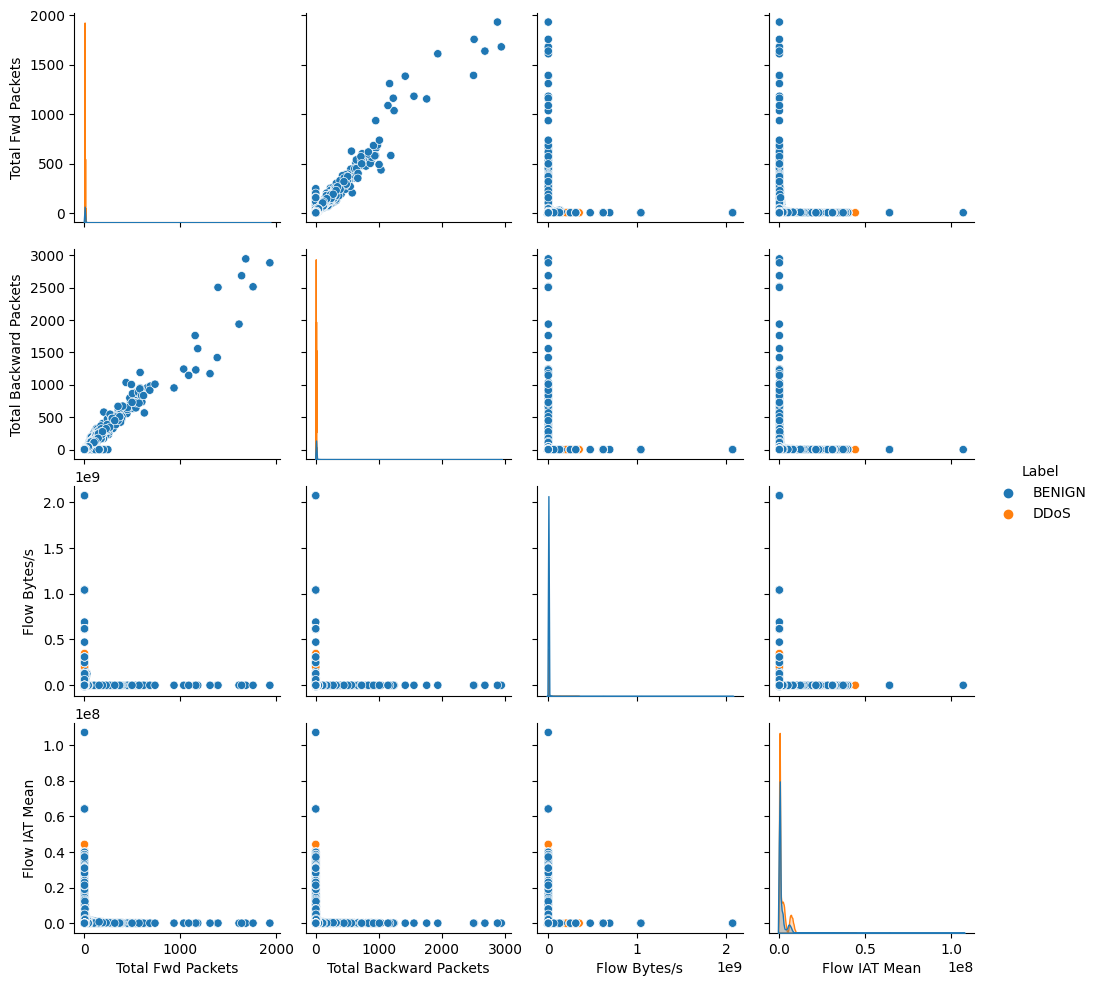

In [ ]:
# Pairplot for selected features
selected_features = ['Total Fwd Packets', 'Total Backward Packets', 'Flow Bytes/s', 'Flow IAT Mean', 'Label']
sns.pairplot(data_f[selected_features], hue='Label', diag_kind='kde')
plt.show()

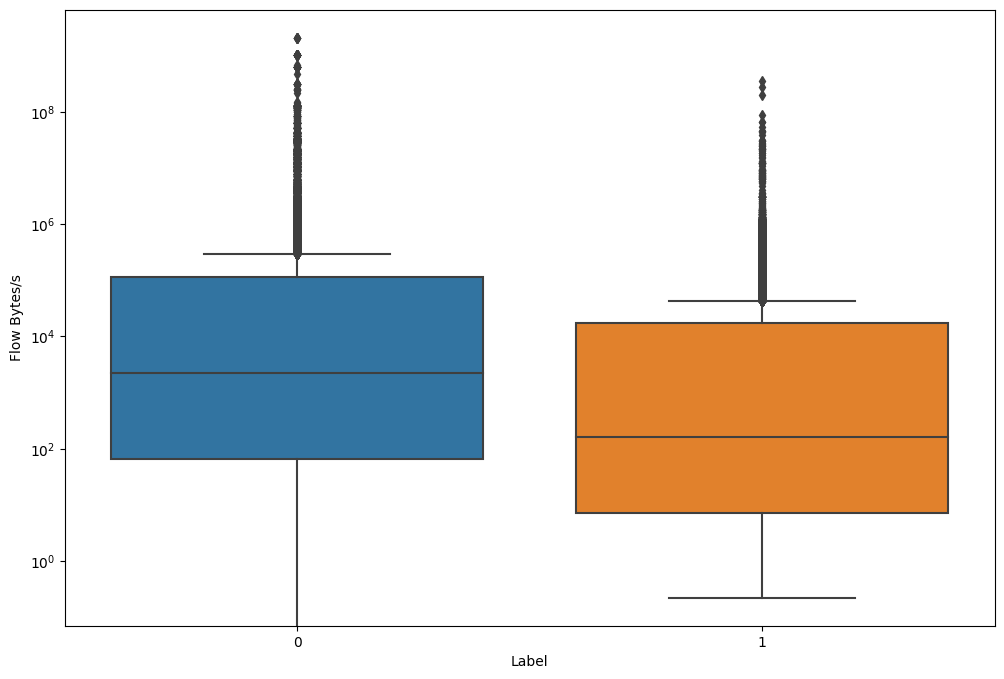

In [ ]:
# Box plot to compare 'Label' vs 'Flow Bytes/s'
plt.figure(figsize=(12, 8))
sns.boxplot(x='Label', y='Flow Bytes/s', data=data_f)
plt.yscale('log')  # Log scale for better visibility
plt.show()


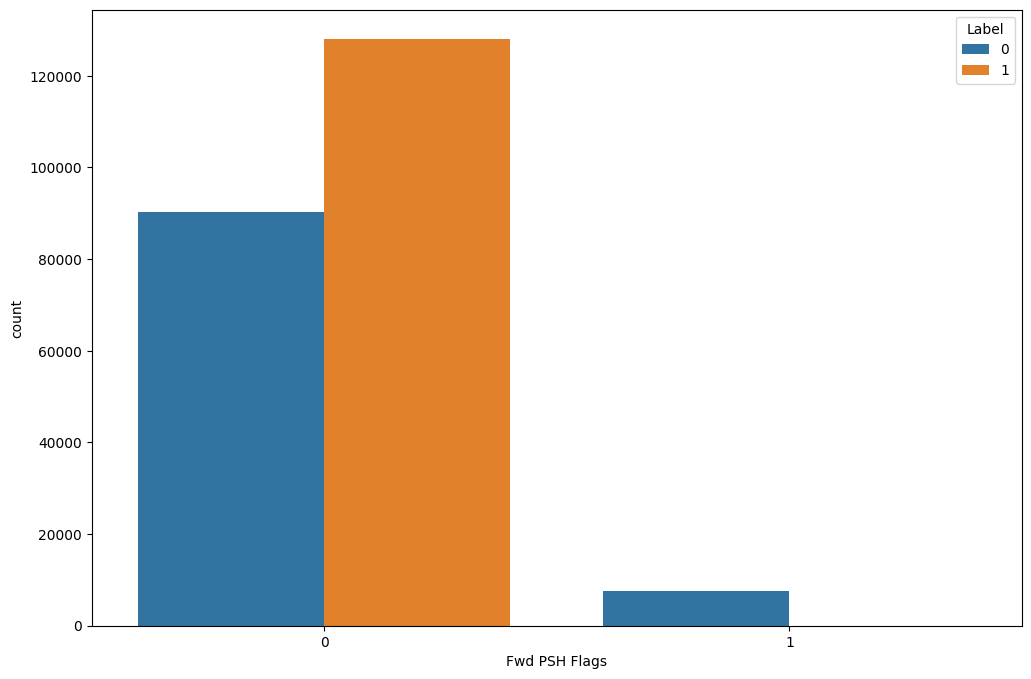

In [ ]:
# Count plot for 'Fwd PSH Flags' and 'Bwd PSH Flags'
plt.figure(figsize=(12, 8))
sns.countplot(x='Fwd PSH Flags', hue='Label', data=data_f)
plt.show()


<ipython-input-51-d2777075167c>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(selected_correlations.corr(), annot=True, cmap='coolwarm', fmt='.2f')


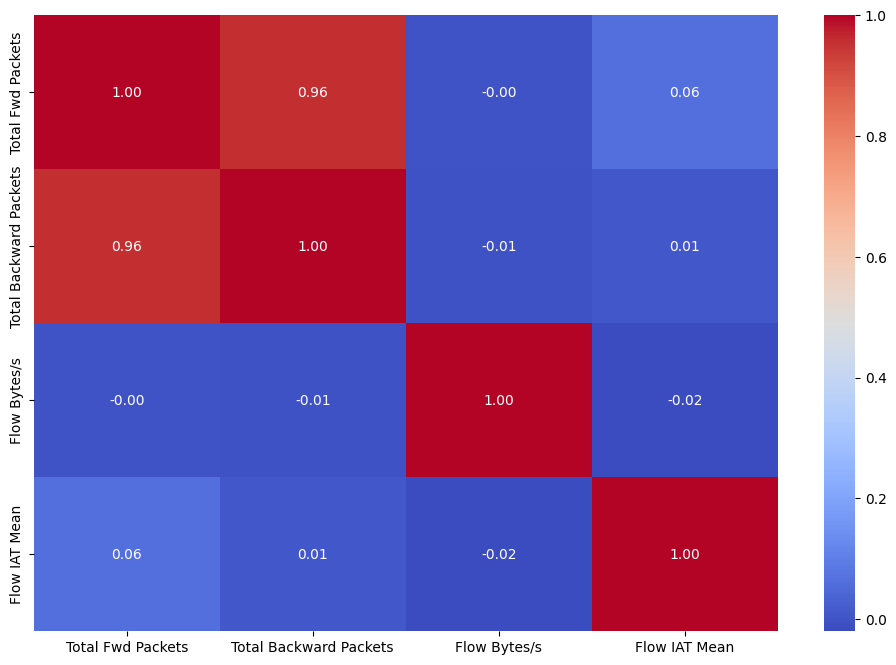

In [ ]:
# Heatmap for selected correlations
selected_correlations = df[['Total Fwd Packets', 'Total Backward Packets', 'Flow Bytes/s', 'Flow IAT Mean', 'Label']]
plt.figure(figsize=(12, 8))
sns.heatmap(selected_correlations.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


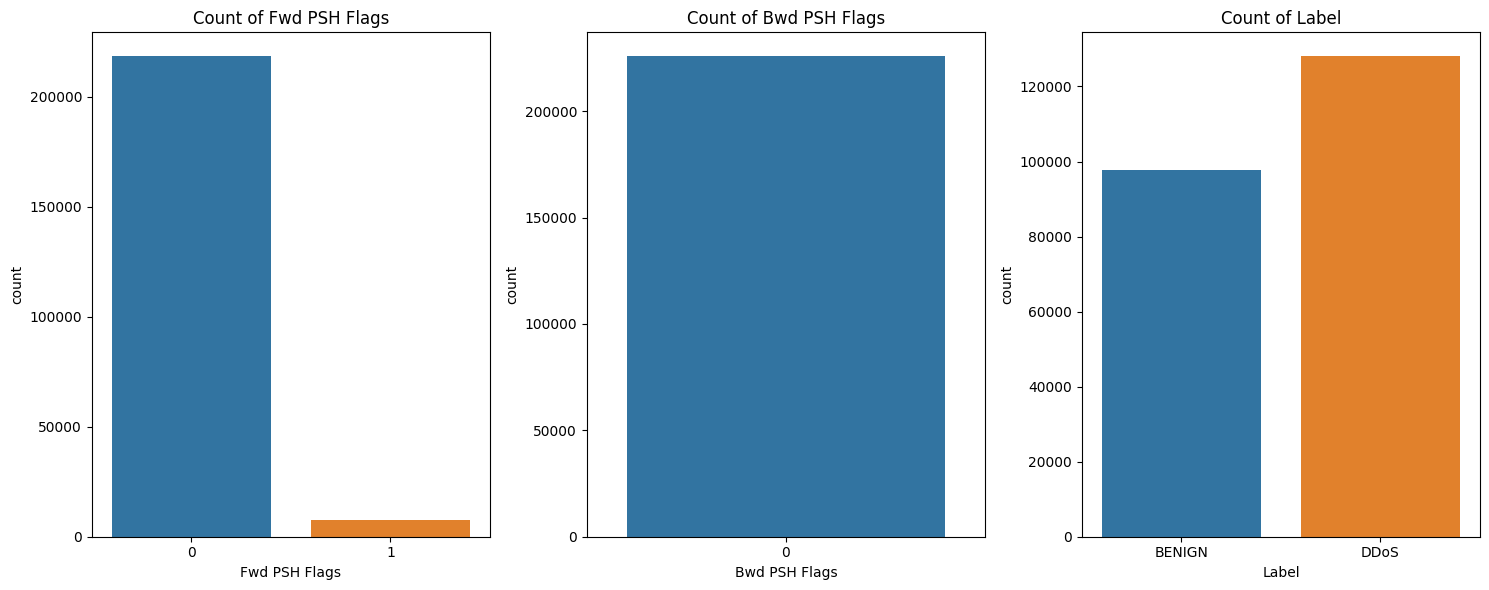

In [ ]:
# Categorical feature analysis
categorical_features = ['Fwd PSH Flags', 'Bwd PSH Flags', 'Label']
plt.figure(figsize=(15, 6))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(1, 3, i)
    sns.countplot(x=feature, data=df)
    plt.title(f'Count of {feature}')
plt.tight_layout()
plt.show()


## Data splitting into train and test

In [ ]:
X = data_f.drop('Label', axis=1)
y = data_f['Label']

X.replace([np.inf, -np.inf], np.nan, inplace=True)

X.fillna(0, inplace=True)

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
print("The train dataset size = ",X_train.shape)
print("The test dataset size = ",X_test.shape)

The train dataset size =  (158018, 78)
The test dataset size =  (67723, 78)


# ----------------------------Training the model--------------------------------

### Random Forest

In [ ]:
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

### Model Evaluation

In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [ ]:
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)

print('\nRandom Forest Metrics:')
print(f'Accuracy: {rf_accuracy:.4f}')
print(f'F1 Score: {rf_f1:.4f}')
print(f'Precision: {rf_precision:.4f}')
print(f'Recall: {rf_recall:.4f}')


Random Forest Metrics:
Accuracy: 0.9997
F1 Score: 0.9998
Precision: 0.9999
Recall: 0.9996


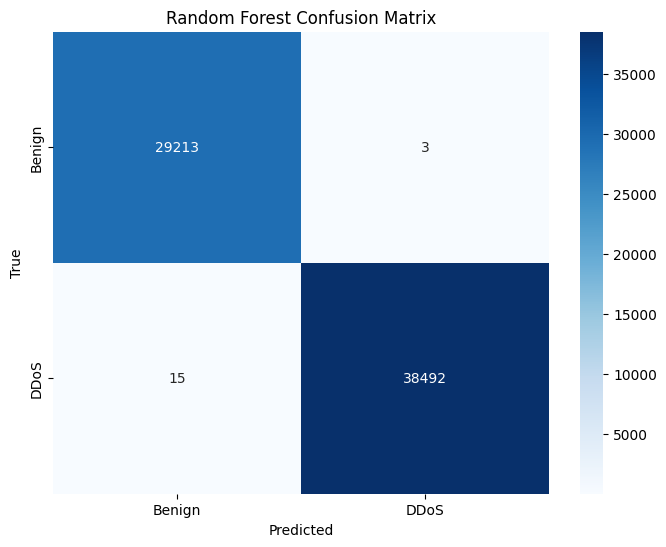

In [ ]:
plot_confusion_matrix(y_test, rf_pred, ['Benign', 'DDoS'], 'Random Forest Confusion Matrix')

### Logistic Regression

In [ ]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Evaluate Logistic Regression

In [ ]:

lr_accuracy = accuracy_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred)
lr_recall = recall_score(y_test, lr_pred)

In [ ]:
print('\nLogistic Regression Metrics:')
print(f'Accuracy: {lr_accuracy:.4f}')
print(f'F1 Score: {lr_f1:.4f}')
print(f'Precision: {lr_precision:.4f}')
print(f'Recall: {lr_recall:.4f}')


Logistic Regression Metrics:
Accuracy: 0.9882
F1 Score: 0.9897
Precision: 0.9802
Recall: 0.9994


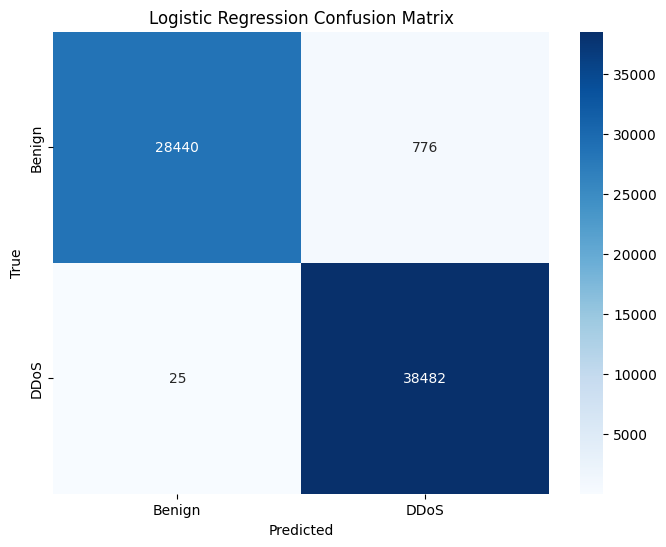

In [ ]:
# Confusion Matrix for Logistic Regression
plot_confusion_matrix(y_test, lr_pred, ['Benign', 'DDoS'], 'Logistic Regression Confusion Matrix')

In [ ]:
svc=svc_model = SVC(kernel='linear',probability=True)

### Neural Network

In [ ]:
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)

### # Evaluate Neural Network

In [ ]:
svc_accuracy = accuracy_score(y_test, svc_pred)
svc_f1 = f1_score(y_test, svc_pred)
svc_precision = precision_score(y_test, svc_pred)
svc_recall = recall_score(y_test, svc_pred)

print('\n SVM Metrics:')
print(f'Accuracy: {svc_accuracy:.4f}')
print(f'F1 Score: {svc_f1:.4f}')
print(f'Precision: {svc_precision:.4f}')
print(f'Recall: {svc_recall:.4f}')


Neural Network Metrics:
Accuracy: 0.9888
F1 Score: 0.9902
Precision: 0.9814
Recall: 0.9993


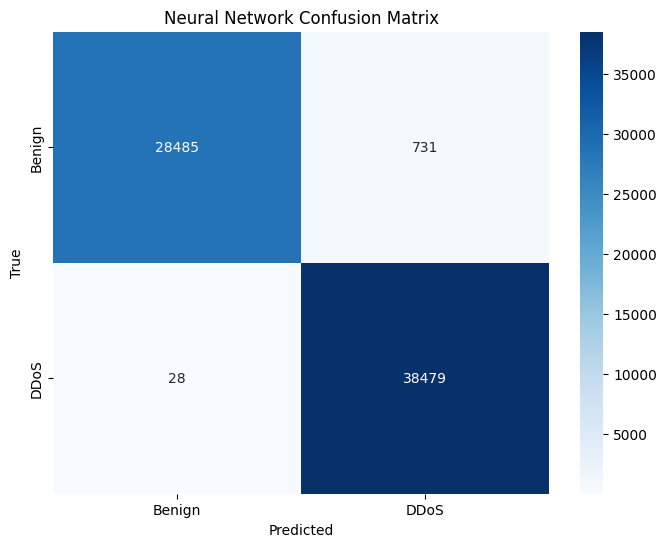

In [ ]:
plot_confusion_matrix(y_test, svc_pred, ['Benign', 'DDoS'], 'Neural Network Confusion Matrix')

## Model Comparison

In [ ]:
rf_proba = rf_model.predict_proba(X_test)

lr_proba = lr_model.predict_proba(X_test)

svc_proba = svc.predict_proba(X_test)


In [ ]:
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_proba[:, 1])
rf_auc = auc(rf_fpr, rf_tpr)

lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_proba[:, 1])
lr_auc = auc(lr_fpr, lr_tpr)



svc_fpr, svc_tpr, _ = roc_curve(y_test, svc_proba[:, 1])
svc_auc = auc(svc_fpr, svc_tpr)


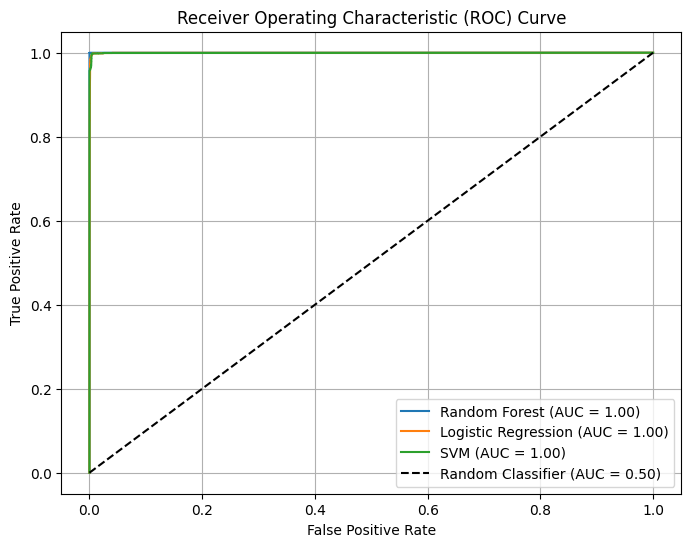

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_auc:.2f})')
plt.plot(svc_fpr, svc_tpr, label=f'SVM (AUC = {svc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random Classifier (AUC = 0.50)')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()